In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
file_path = 'C:/Users/user/Desktop/Bellabeat_Data/combinedMinuteData.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

           Id           ActivityMinute  Calories  Intensity  Steps  METs
0  2026352035  2016-04-23 23:59:00 UTC    0.0000          0      0     0
1  8053475328  2016-04-26 23:59:00 UTC    0.0000          0      0     0
2  4558609924  2016-05-11 23:59:00 UTC    0.0000          0      0     0
3  7086361926  2016-05-06 18:25:00 UTC    0.0000          0      0     0
4  6962181067  2016-04-21 05:09:00 UTC    0.8964          0      0    10


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
 3   Intensity       1325580 non-null  int64  
 4   Steps           1325580 non-null  int64  
 5   METs            1325580 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 60.7+ MB
None


In [10]:
# Convert 'ActivityMinute' to datetime object
df['ActivityMinute'] = pd.to_datetime(df['ActivityMinute'])

# Convert to display the dates in 'm/d/y H:M:S' format
df['ActivityMinute'] = df['ActivityMinute'].dt.strftime('%m/%d/%Y %H:%M:%S')

# Convert 'ActivityMinute' to datetime object
df['ActivityMinute'] = pd.to_datetime(df['ActivityMinute'])

# Generate summary statistics
summary_statistics = df.describe(include='all')

# To view the summary statistics
print(summary_statistics)

                  Id       ActivityMinute      Calories     Intensity  \
count   1.325580e+06              1325580  1.325580e+06  1.325580e+06   
unique           NaN                44160           NaN           NaN   
top              NaN  2016-04-12 00:00:00           NaN           NaN   
freq             NaN                   33           NaN           NaN   
first            NaN  2016-04-12 00:00:00           NaN           NaN   
last             NaN  2016-05-12 15:59:00           NaN           NaN   
mean    4.847898e+09                  NaN  1.623130e+00  2.005937e-01   
std     2.422313e+09                  NaN  1.410447e+00  5.190227e-01   
min     1.503960e+09                  NaN  0.000000e+00  0.000000e+00   
25%     2.320127e+09                  NaN  9.357000e-01  0.000000e+00   
50%     4.445115e+09                  NaN  1.217600e+00  0.000000e+00   
75%     6.962181e+09                  NaN  1.432700e+00  0.000000e+00   
max     8.877689e+09                  NaN  1.974995

C:\Users\user\AppData\Local\Temp\ipykernel_34812\2593741084.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_statistics = df.describe(include='all')


In [5]:
# Sort the DataFrame by 'Id' and then by 'ActivityHour', both in ascending order
df = df.sort_values(by=['Id', 'ActivityMinute'])

# Reset the index of the sorted DataFrame
df = df.reset_index(drop=True)

In [12]:
print(df.head())

           Id      ActivityMinute  Calories  Intensity  Steps  METs
0  1503960366 2016-04-12 00:00:00    0.7865          0      0    10
1  1503960366 2016-04-12 00:01:00    0.7865          0      0    10
2  1503960366 2016-04-12 00:02:00    0.7865          0      0    10
3  1503960366 2016-04-12 00:03:00    0.7865          0      0    10
4  1503960366 2016-04-12 00:04:00    0.7865          0      0    10


In [7]:
# Find unique values in the 'Id' column
unique_ids = df['Id'].unique()

# Count of unique values
num_unique_ids = len(unique_ids)

# Print the number of unique values
print(f"Number of unique IDs: {num_unique_ids}")

# Print each unique value
print("Unique IDs:")
for id in unique_ids:
    print(id)

Number of unique IDs: 33
Unique IDs:
1503960366
1624580081
1644430081
1844505072
1927972279
2022484408
2026352035
2320127002
2347167796
2873212765
3372868164
3977333714
4020332650
4057192912
4319703577
4388161847
4445114986
4558609924
4702921684
5553957443
5577150313
6117666160
6290855005
6775888955
6962181067
7007744171
7086361926
8053475328
8253242879
8378563200
8583815059
8792009665
8877689391


In [8]:
# Group by 'Id'
grouped = df.groupby('Id')

# Calculate the required statistics for each group
id_stats = grouped['ActivityMinute'].agg(['count', 'min', 'max'])

# Rename the columns for clarity
id_stats = id_stats.rename(columns={'count': 'Number of Minutes', 'min': 'Earliest Time', 'max': 'Latest Time'})

# Print the results for each unique ID
for id, stats in id_stats.iterrows():
    print(f"ID: {id}")
    print(f"Number of Minutes: {stats['Number of Minutes']}")
    print(f"Earliest Time: {stats['Earliest Time']}")
    print(f"Latest Time: {stats['Latest Time']}\n")

ID: 1503960366
Number of Minutes: 43020
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/11/2016 20:59:00

ID: 1624580081
Number of Minutes: 44160
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/12/2016 15:59:00

ID: 1644430081
Number of Minutes: 42480
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/11/2016 11:59:00

ID: 1844505072
Number of Minutes: 43860
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/12/2016 10:59:00

ID: 1927972279
Number of Minutes: 44160
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/12/2016 15:59:00

ID: 2022484408
Number of Minutes: 44100
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/12/2016 14:59:00

ID: 2026352035
Number of Minutes: 44160
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/12/2016 15:59:00

ID: 2320127002
Number of Minutes: 44100
Earliest Time: 04/12/2016 00:00:00
Latest Time: 05/12/2016 14:59:00

ID: 2347167796
Number of Minutes: 24840
Earliest Time: 04/12/2016 00:00:00
Latest Time: 04/29/2016 05:59:00

ID: 2873212765
Numb

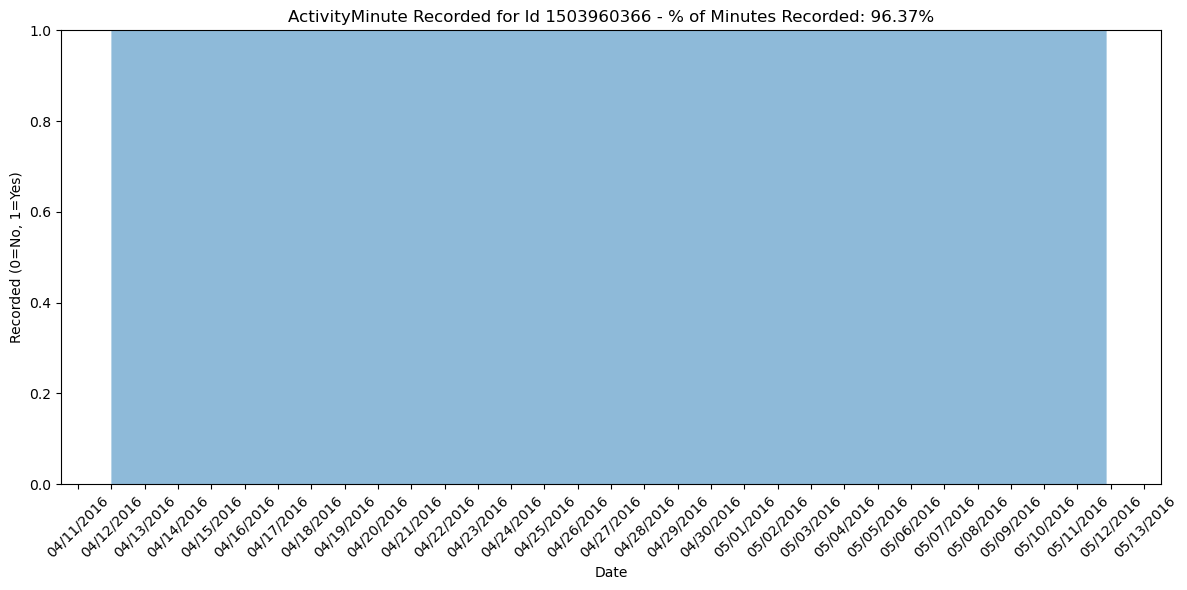

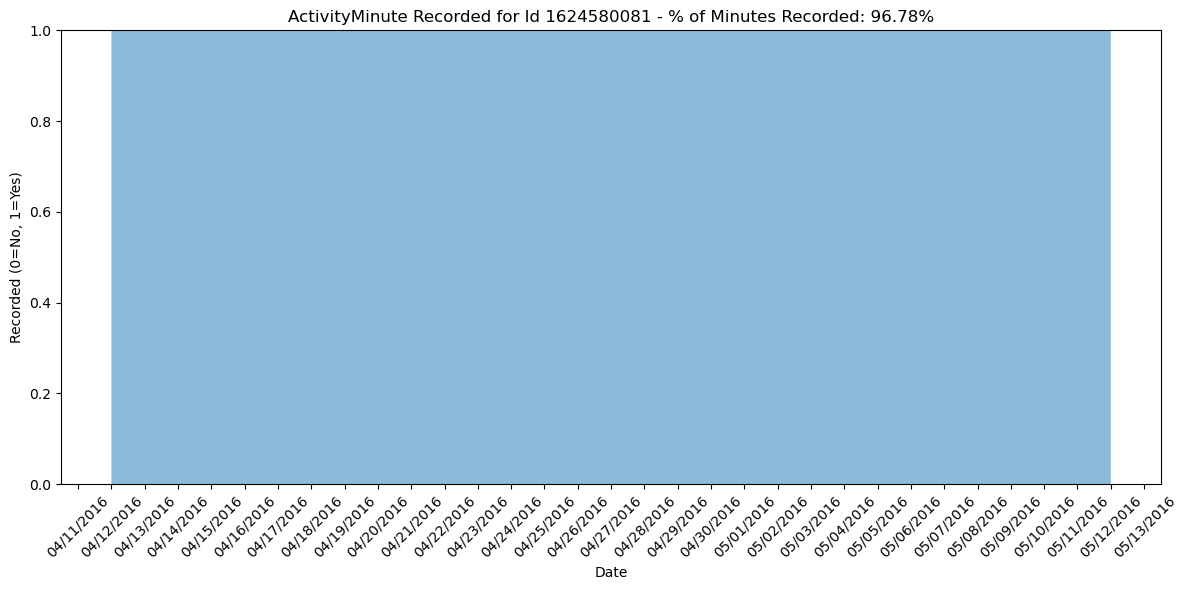

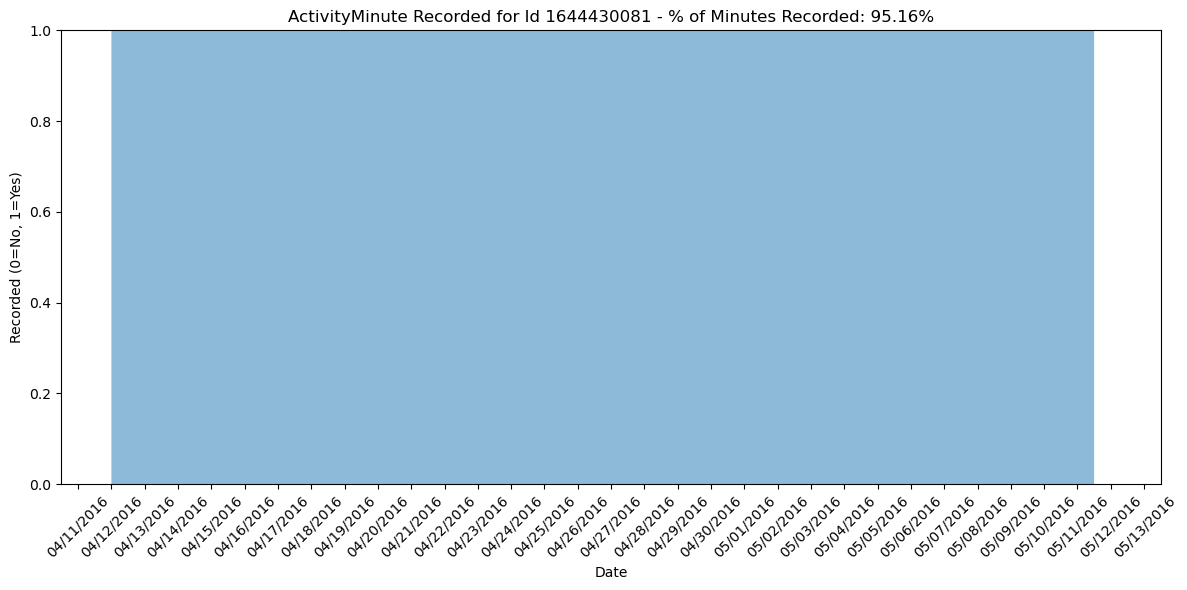

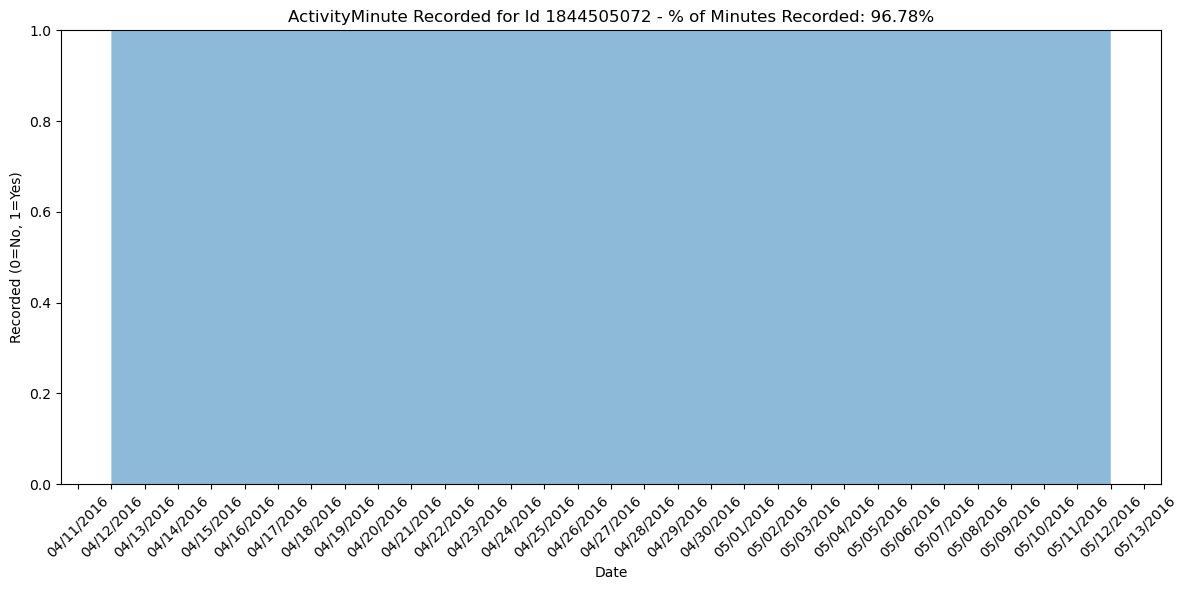

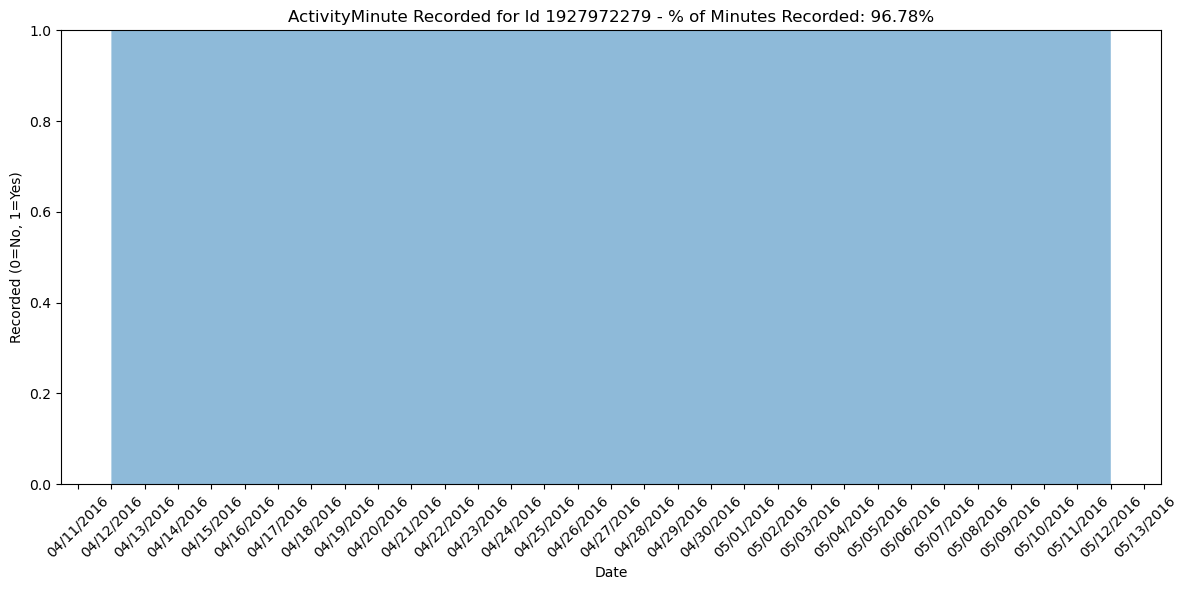

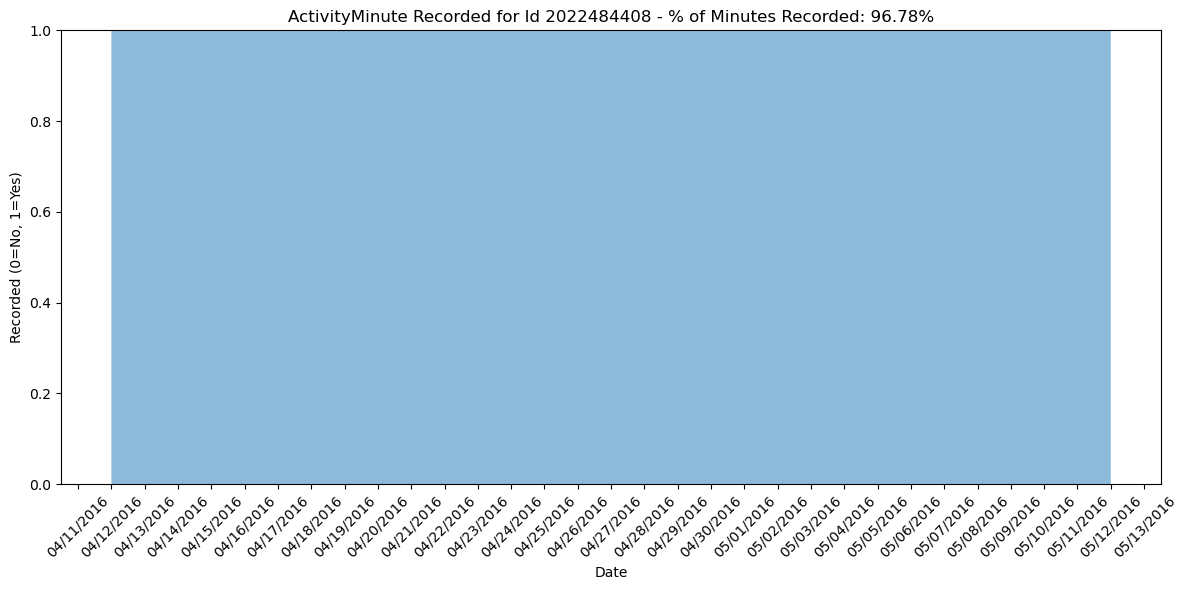

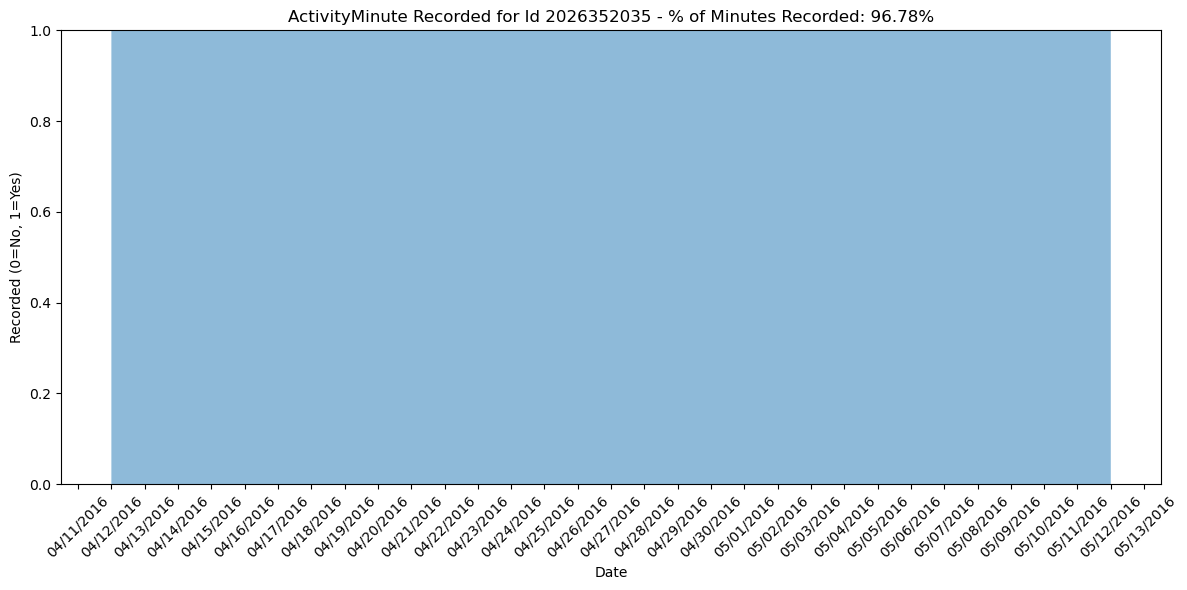

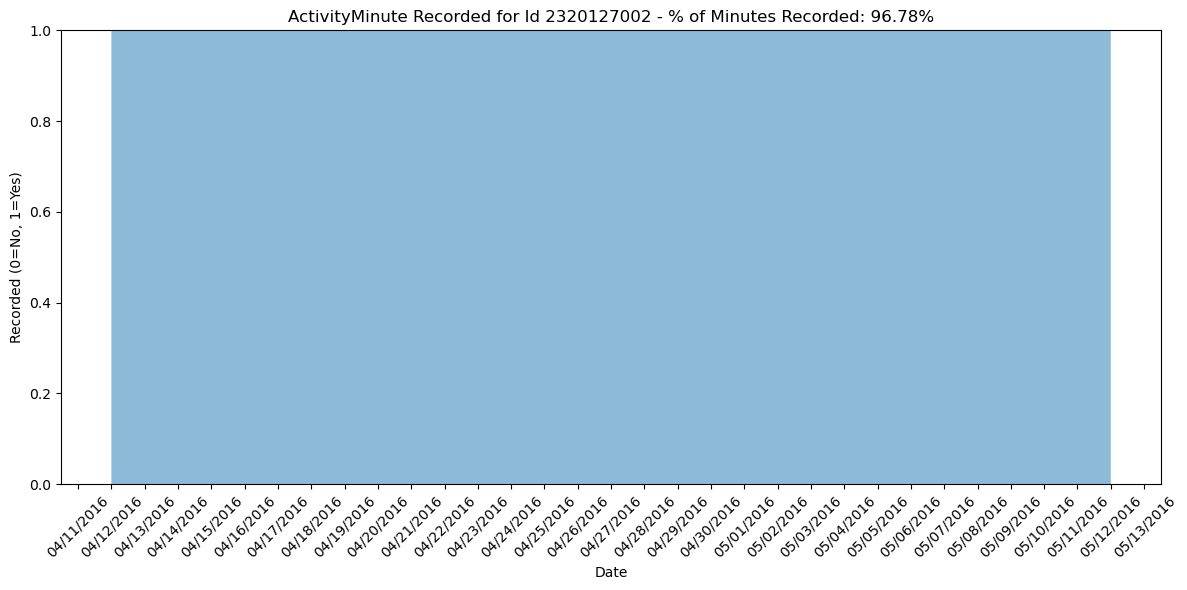

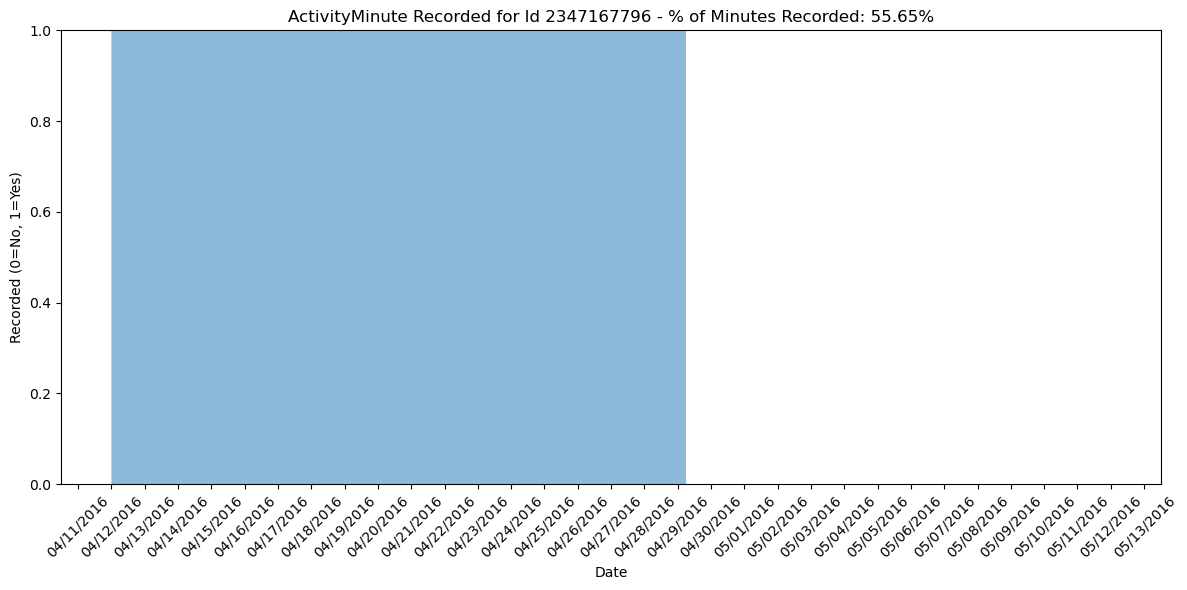

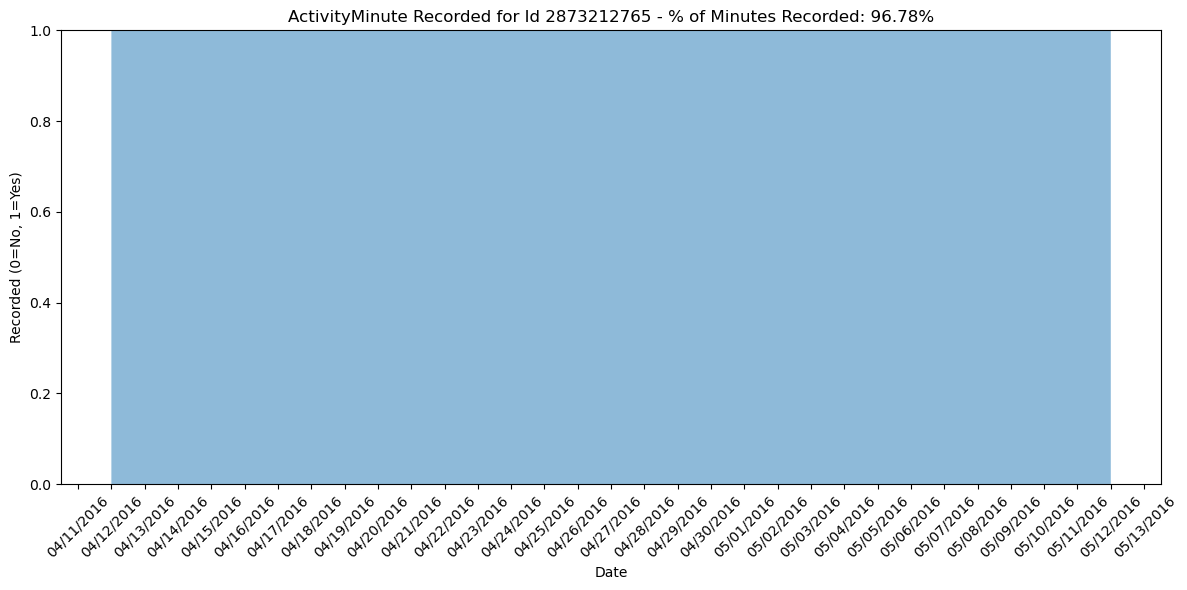

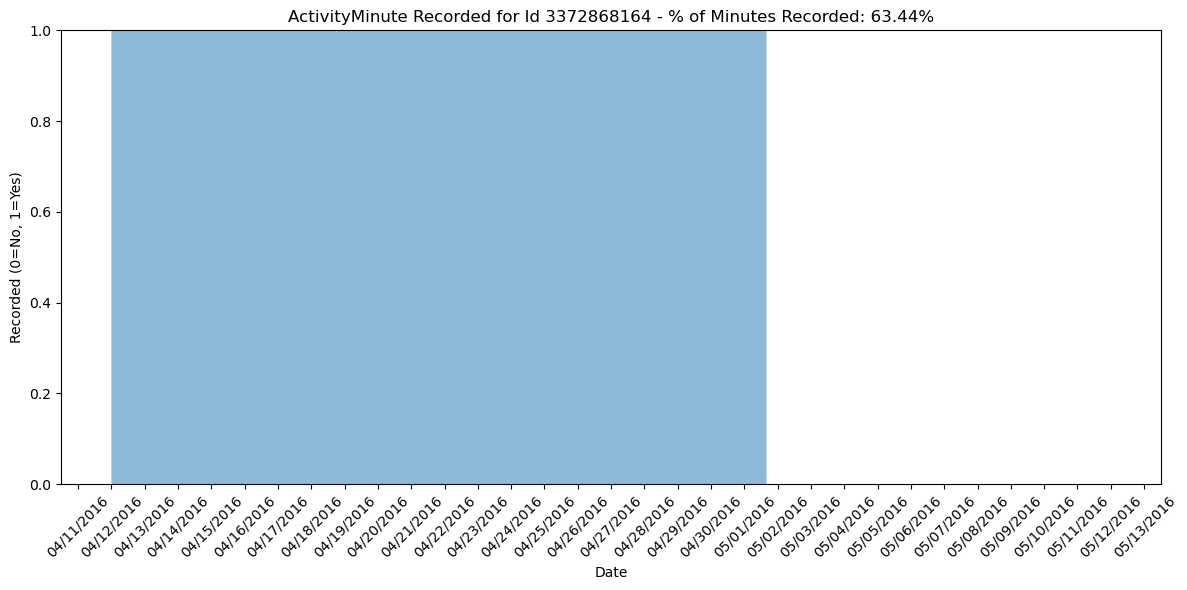

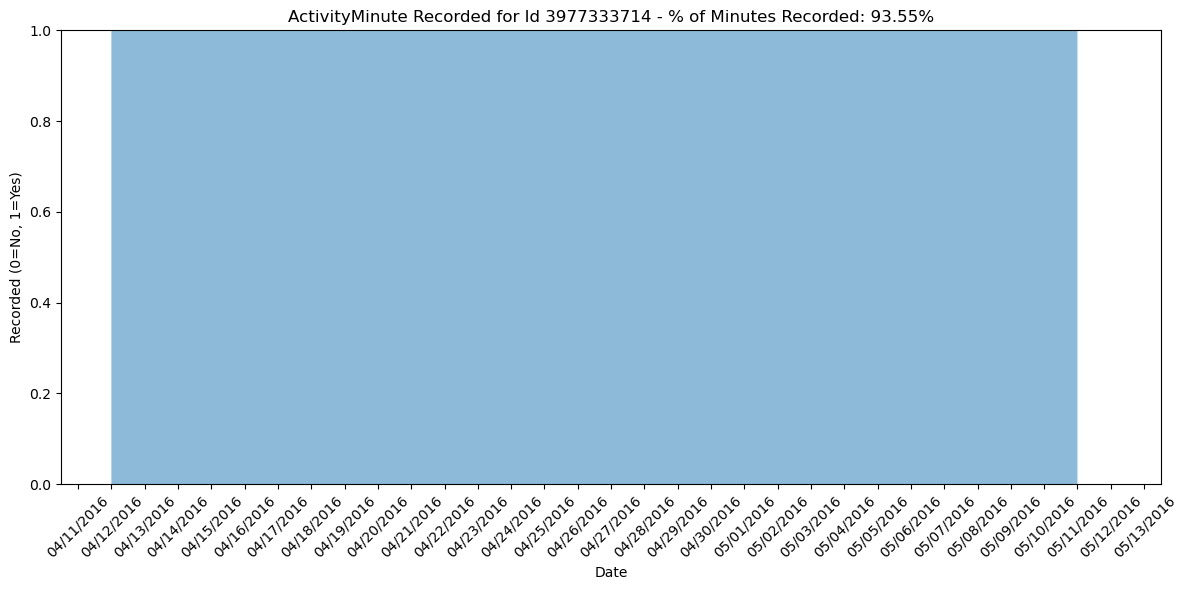

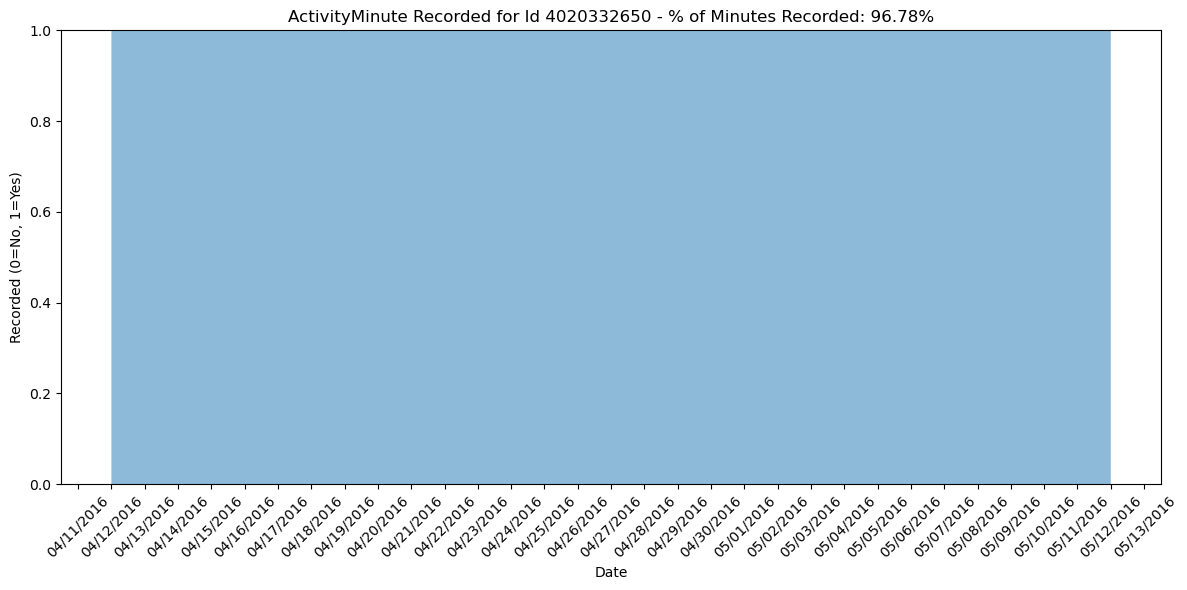

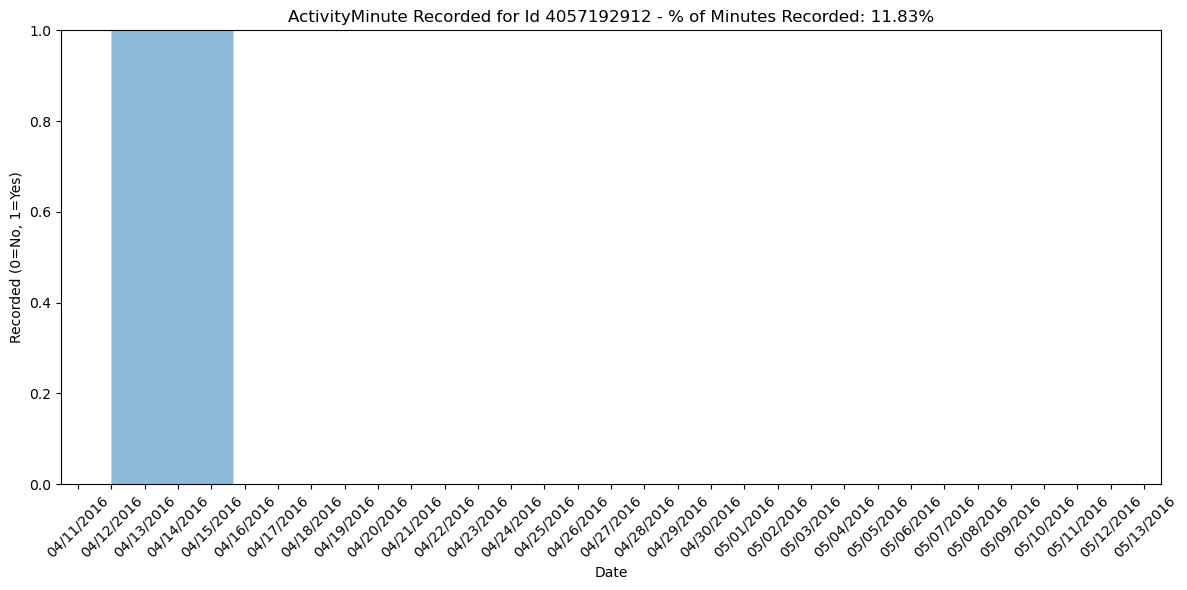

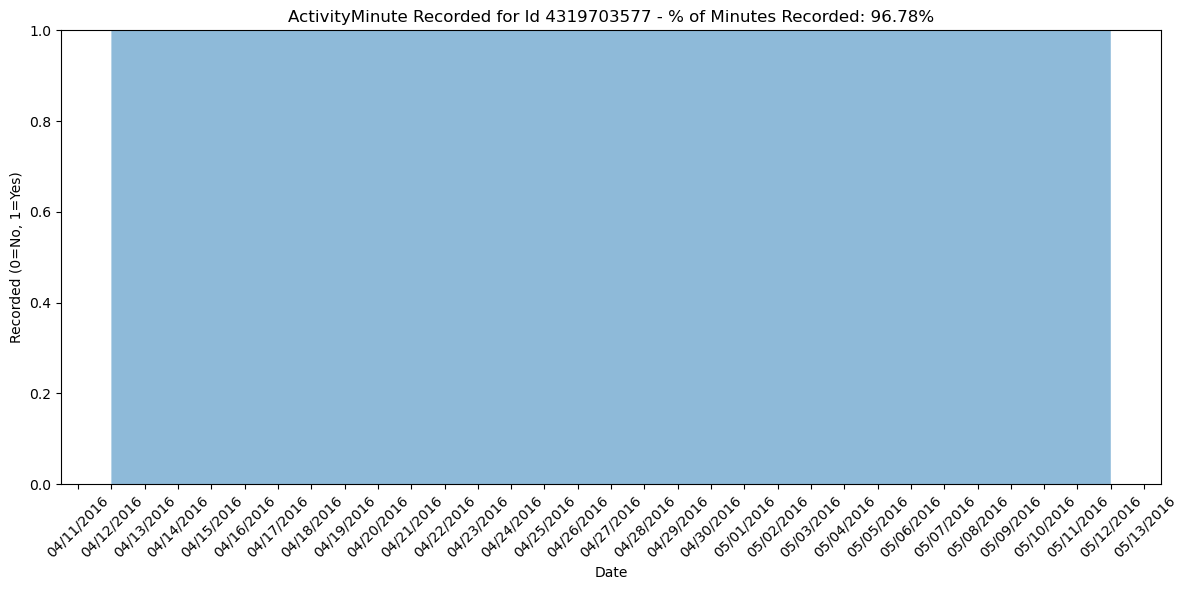

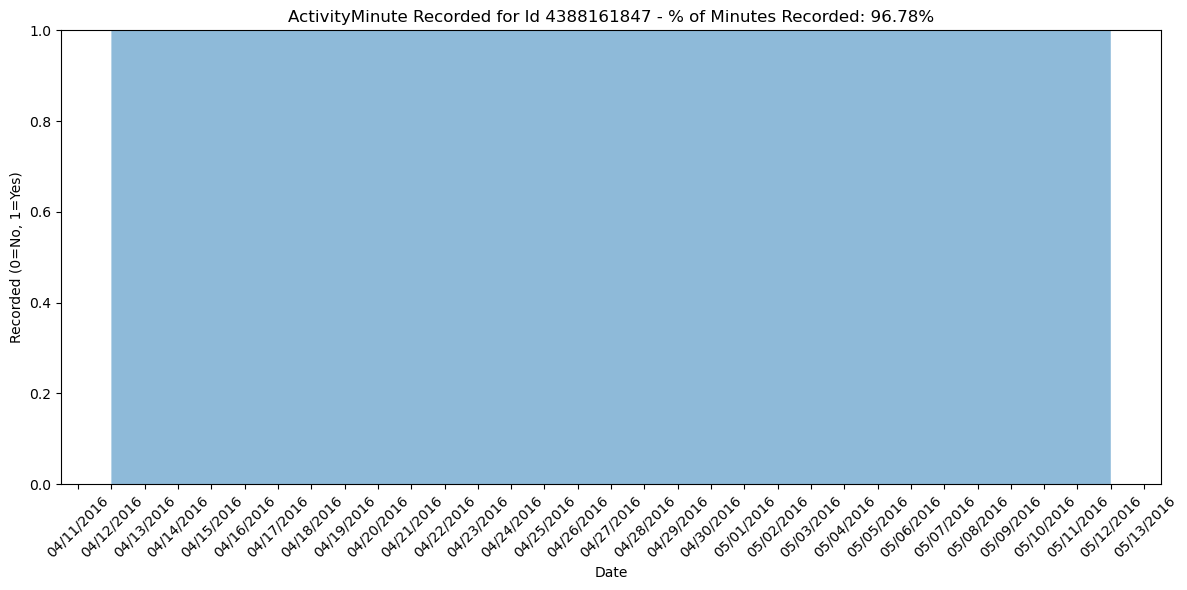

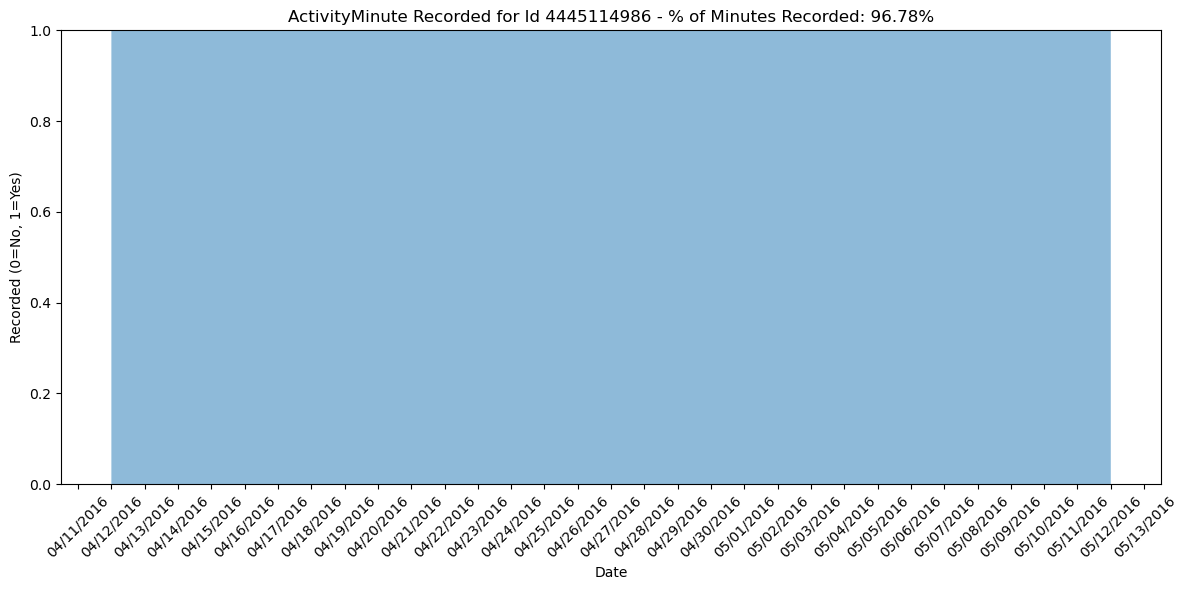

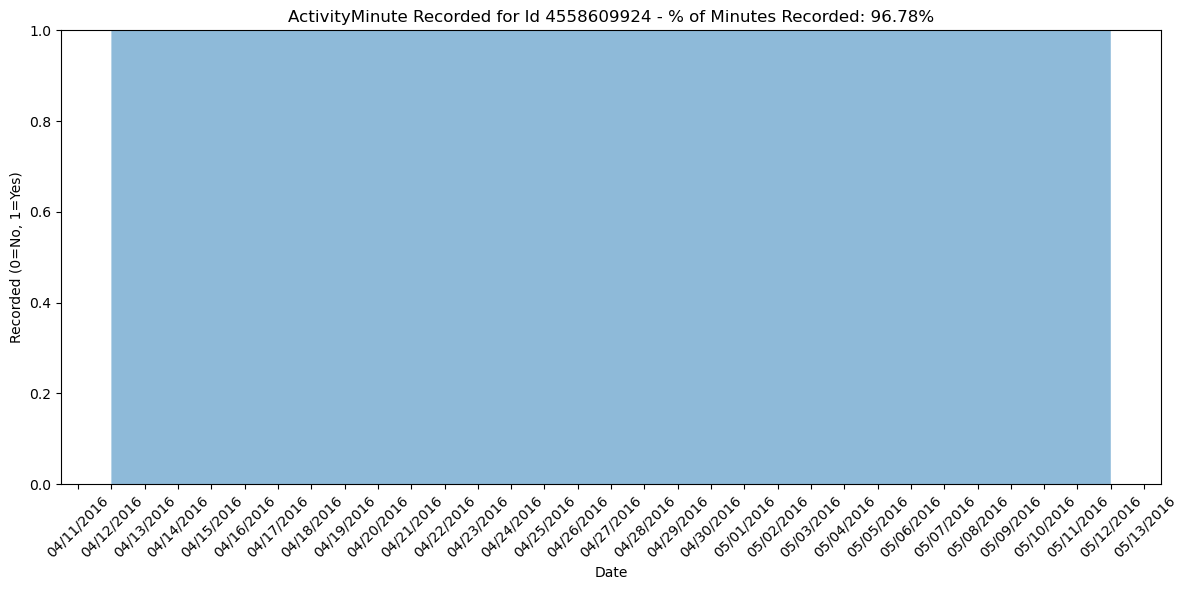

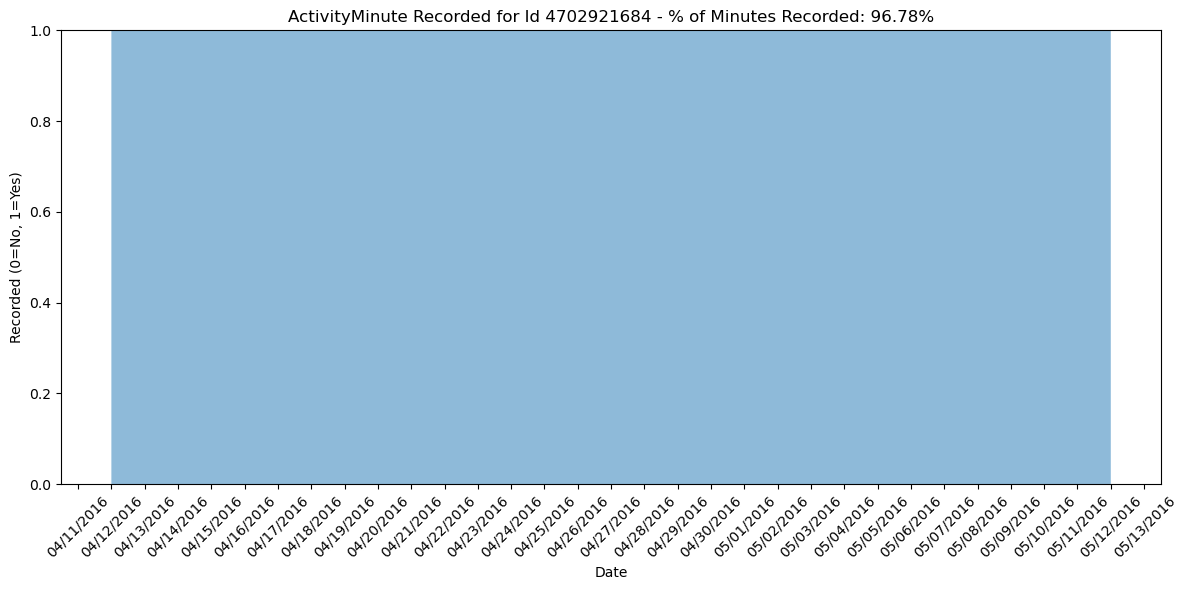

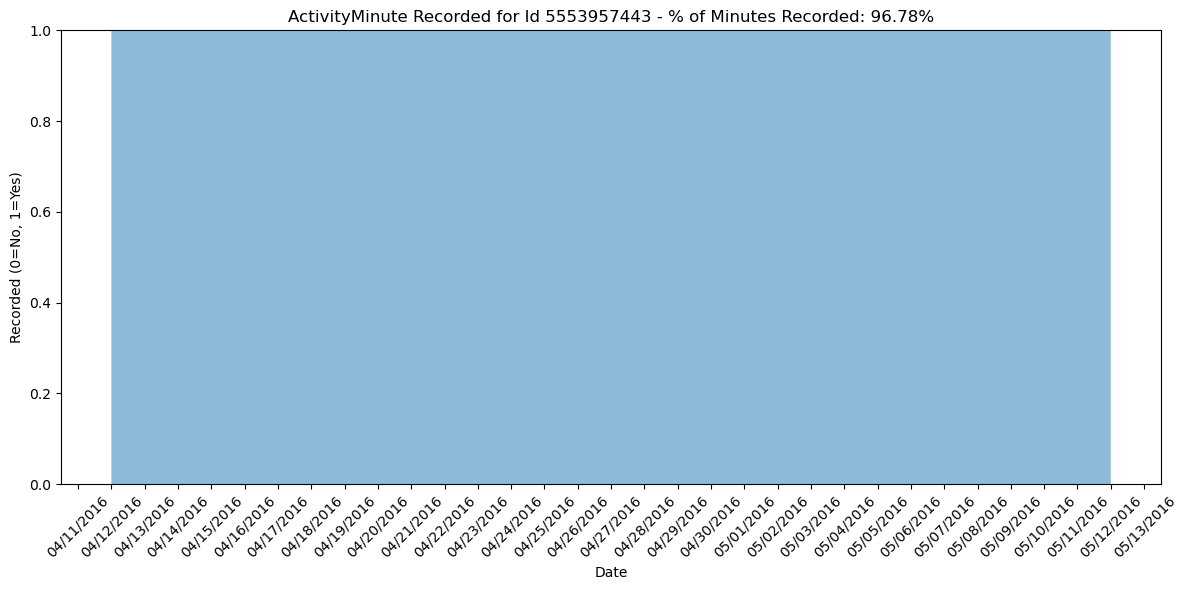

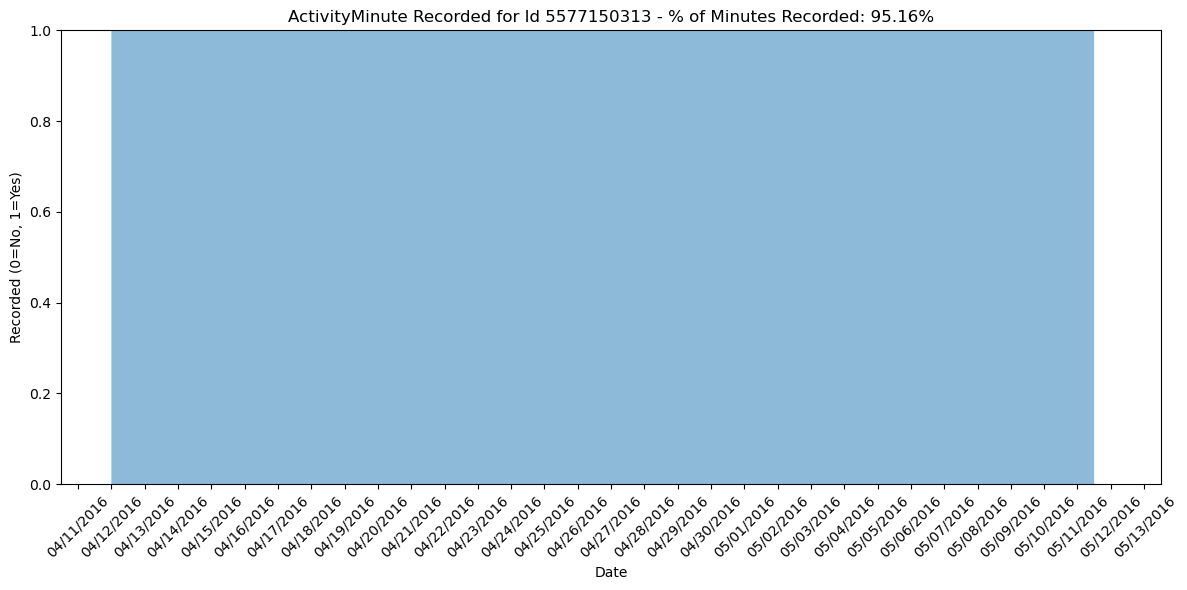

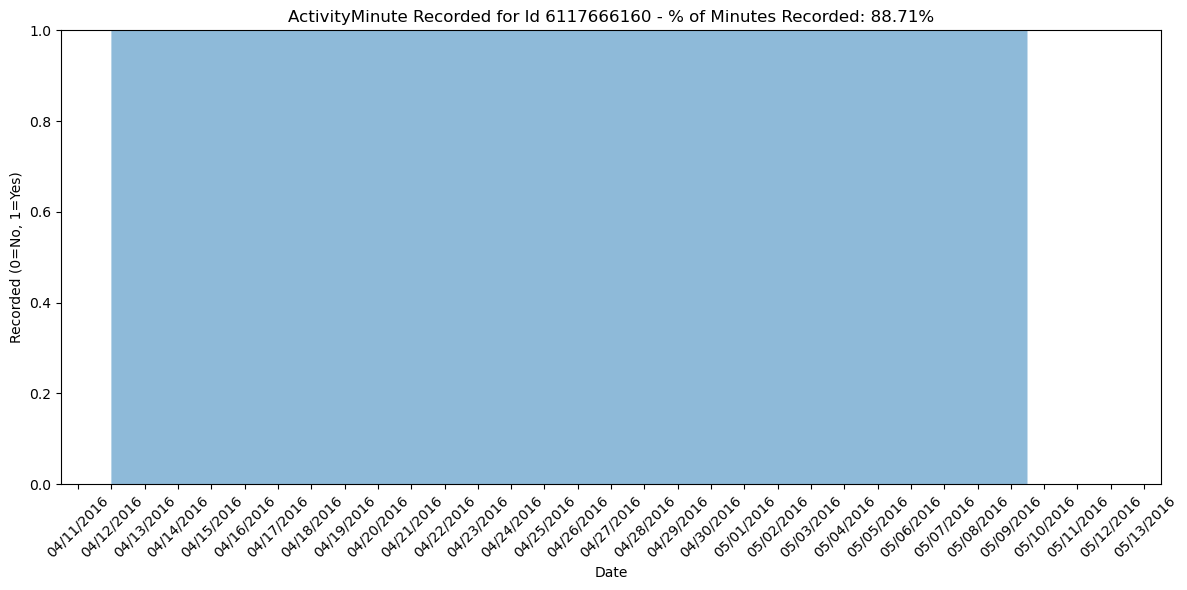

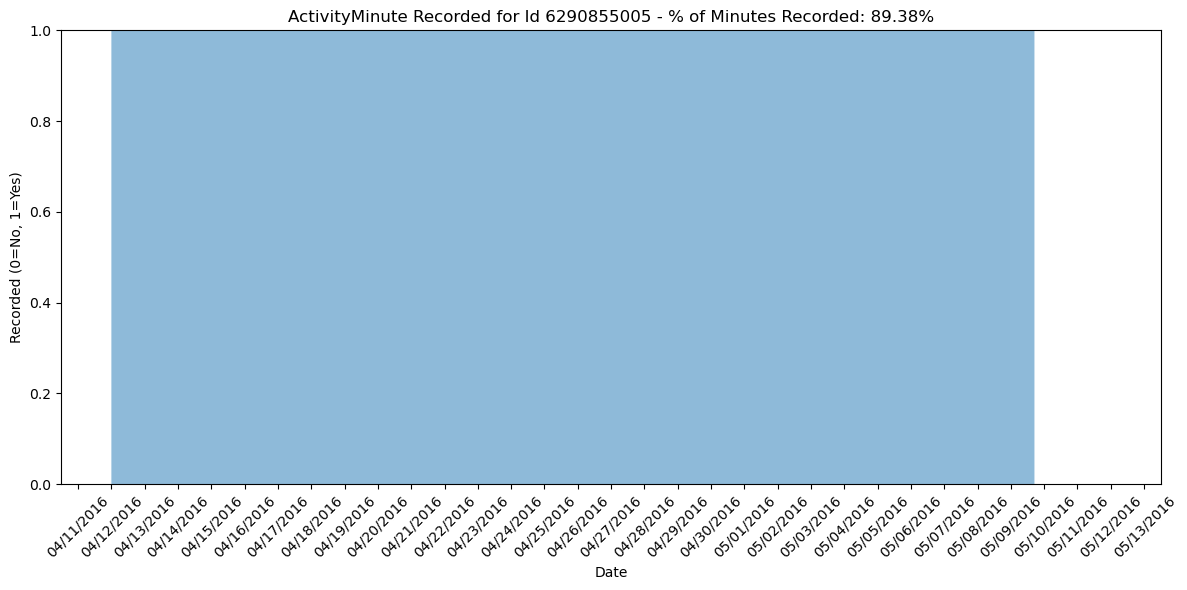

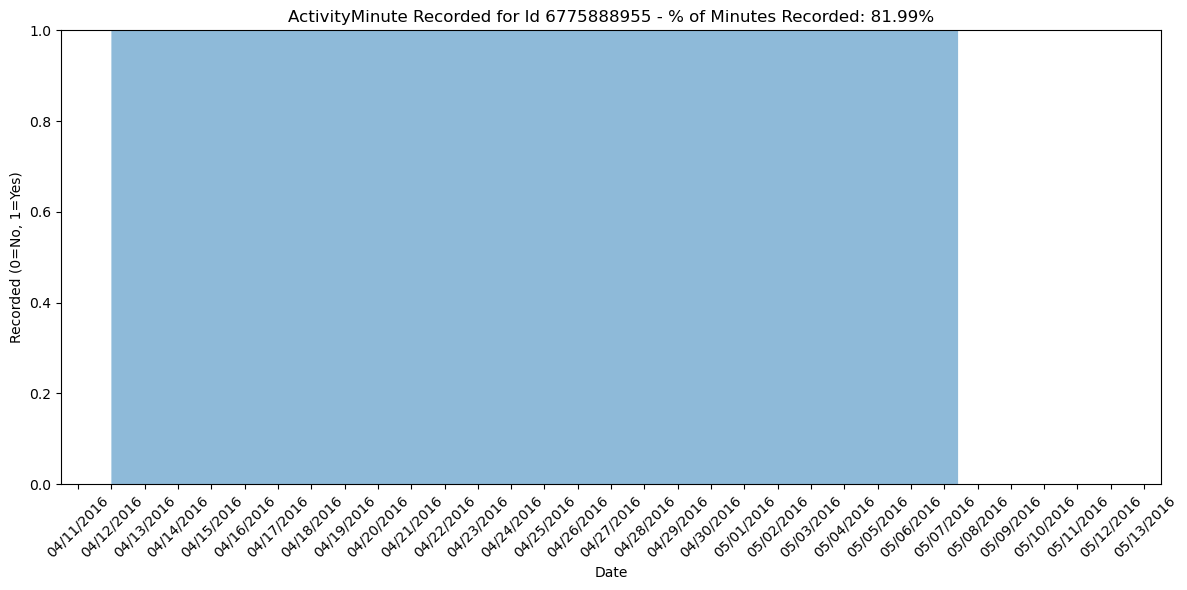

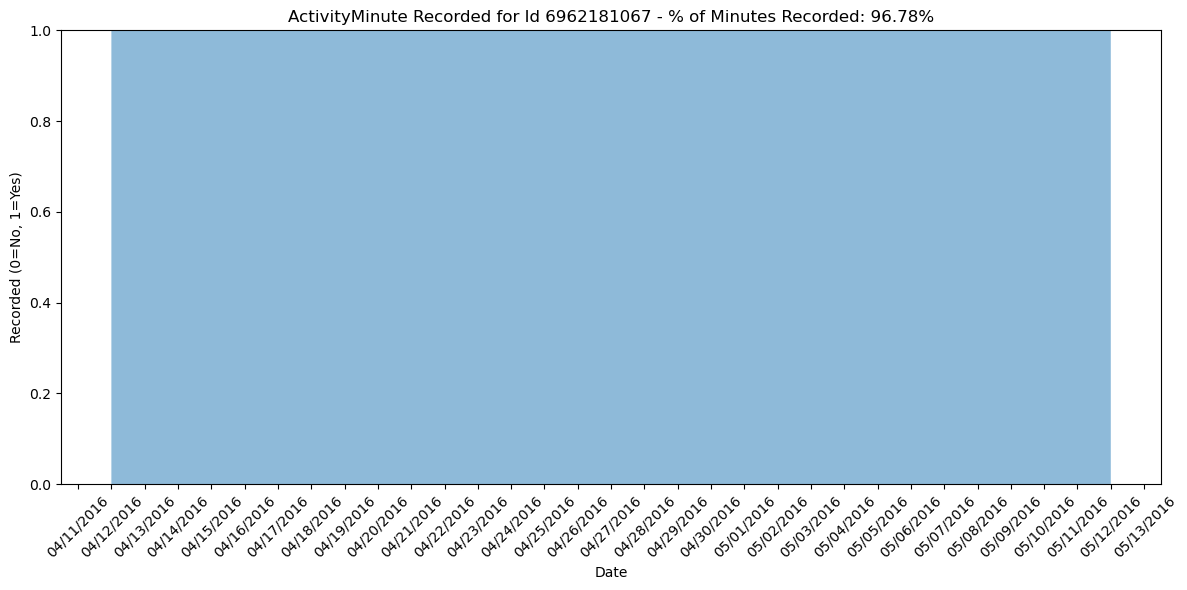

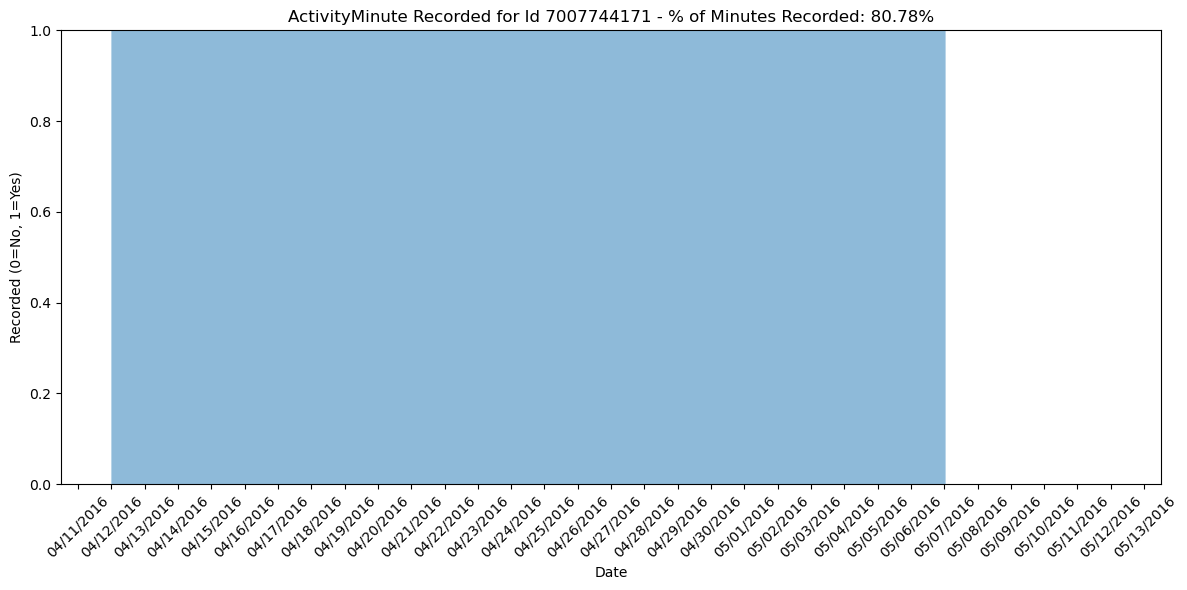

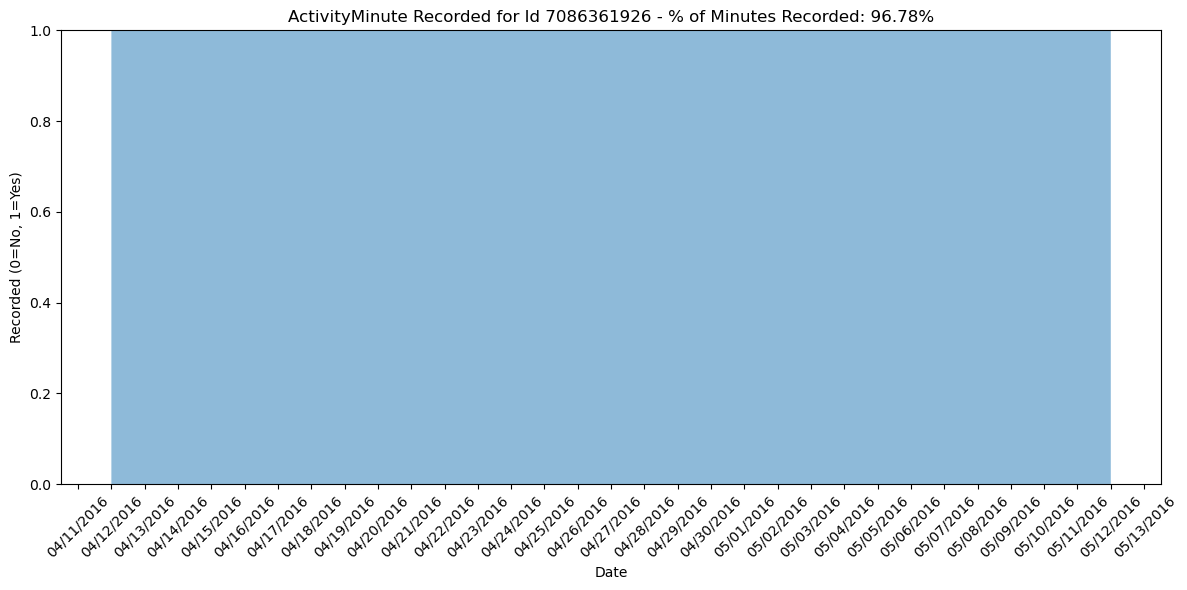

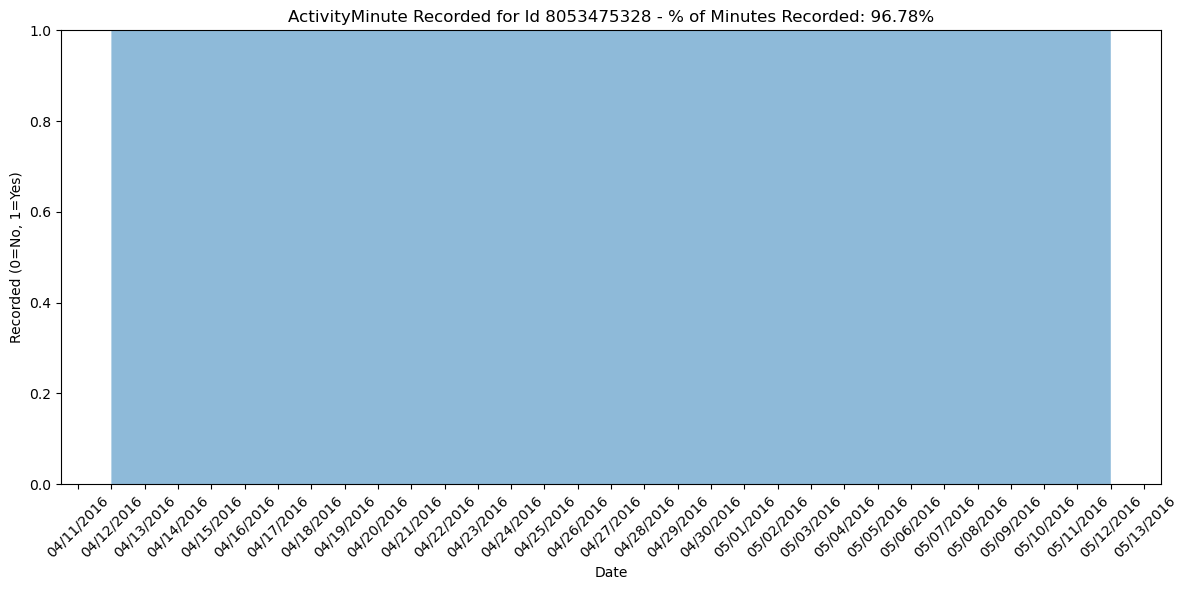

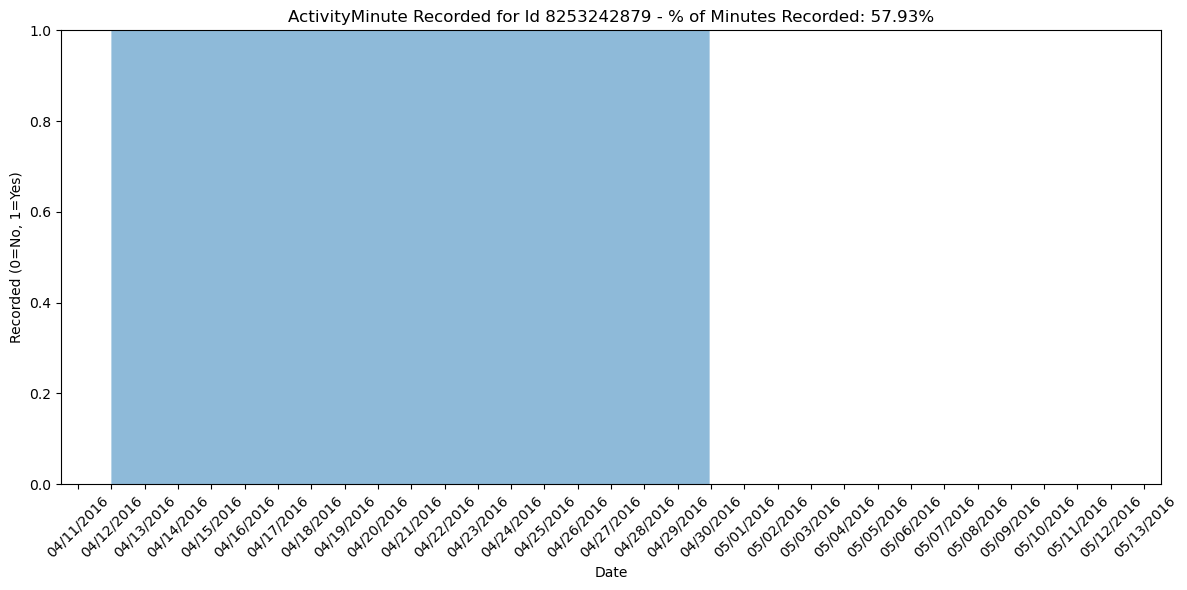

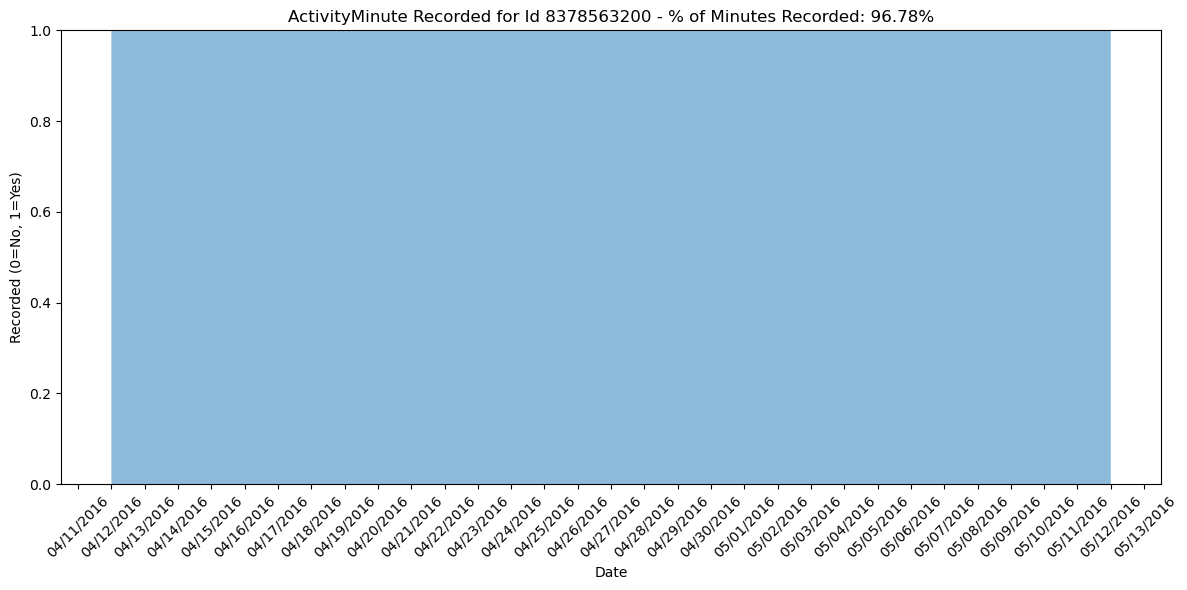

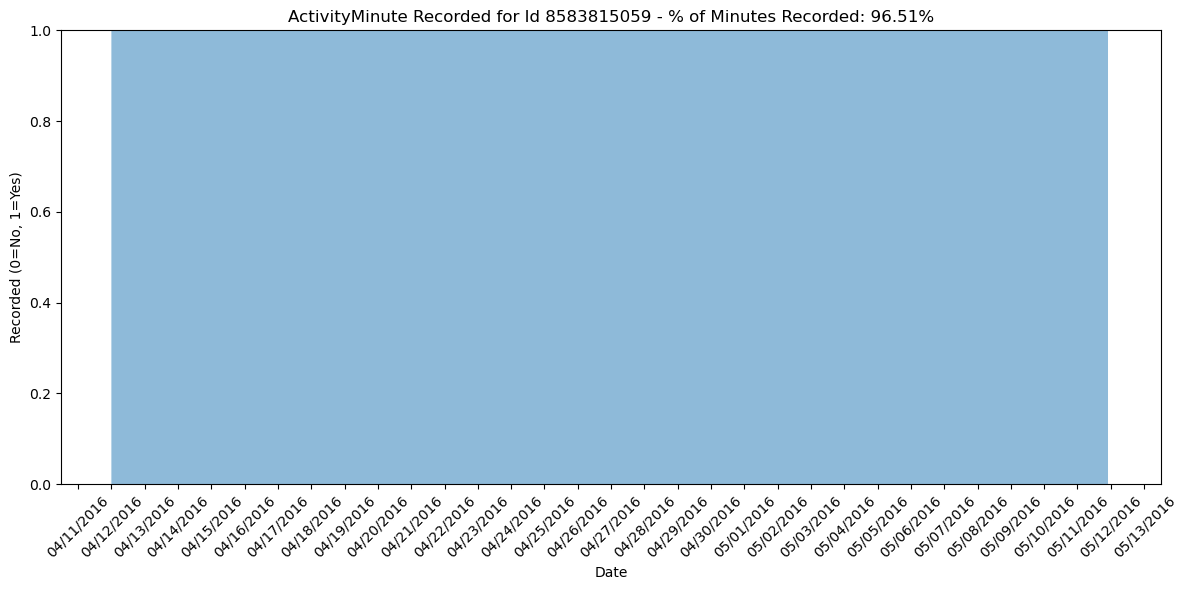

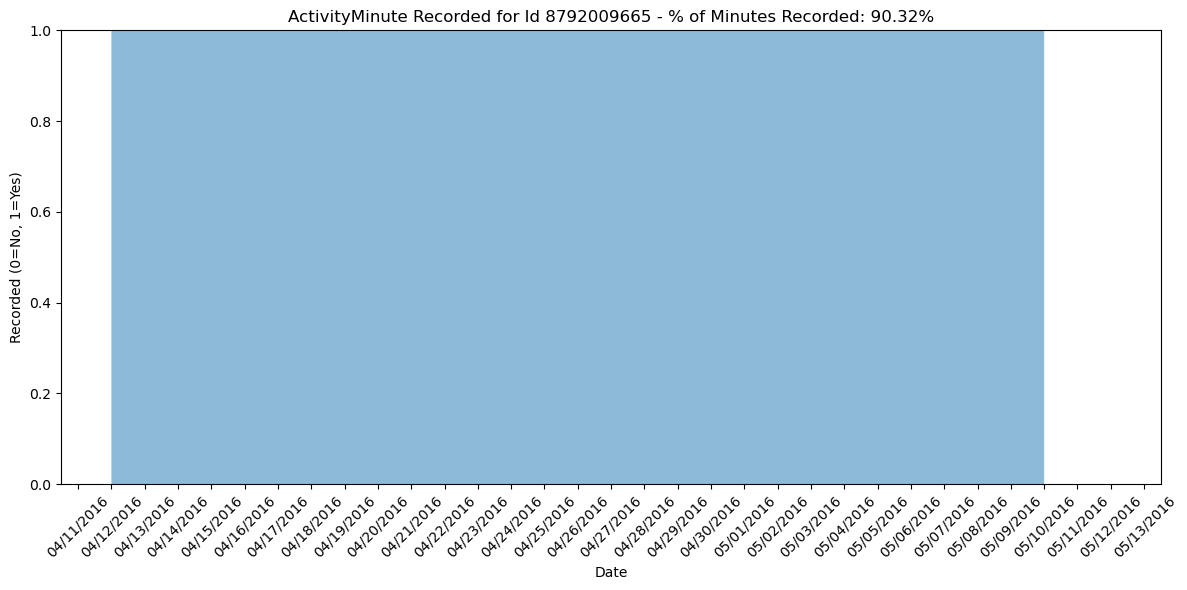

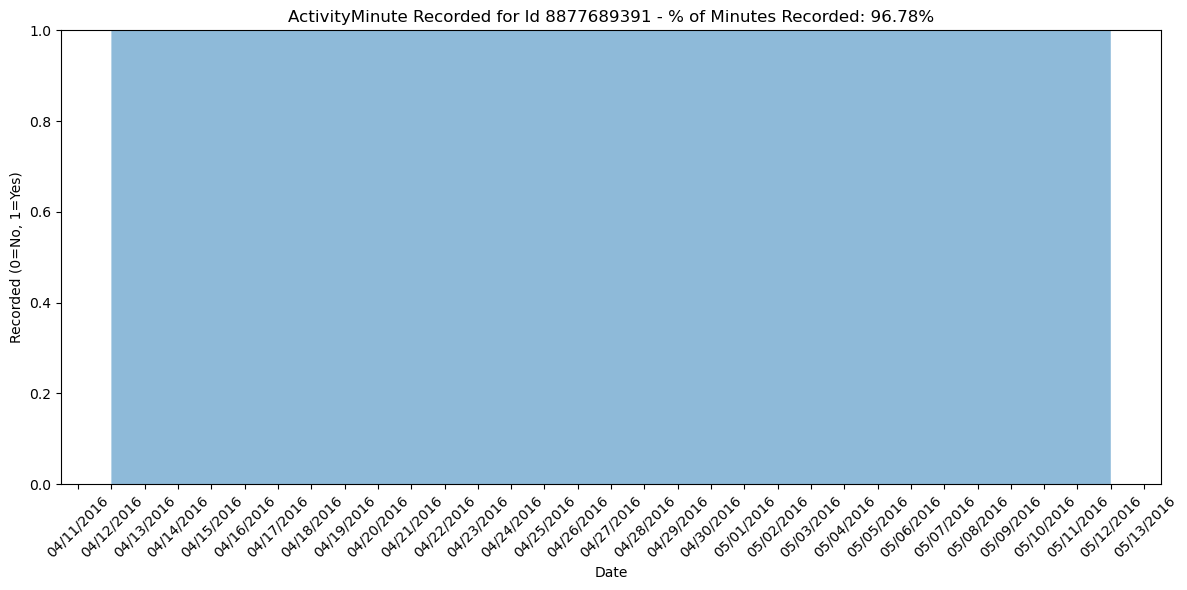

In [14]:
# Define the function to plot for each Id
def plot_activity_for_id(df, id):
    # Filter for the specific Id
    df_id = df[df['Id'] == id]

    # Filter for the date range
    start_date = pd.to_datetime('04/12/2016', format='%m/%d/%Y')
    end_date = pd.to_datetime('05/12/2016', format='%m/%d/%Y')
    df_id = df_id[(df_id['ActivityMinute'] >= start_date) & (df_id['ActivityMinute'] <= end_date)]

    # Create a complete DataFrame for the date range
    all_dates = pd.date_range(start=start_date, end=end_date, freq='T')  # 'T' for minute frequency
    df_full = pd.DataFrame({'ActivityMinute': all_dates})
    df_full = df_full.set_index('ActivityMinute')
    df_full['Recorded'] = 0  # Default to not recorded
    df_full.loc[df_full.index.intersection(df_id['ActivityMinute']), 'Recorded'] = 1  # Mark recorded times

    # Calculate the percentage of minutes recorded
    percentage_recorded = df_full['Recorded'].sum() / 44640 * 100

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.fill_between(df_full.index, df_full['Recorded'], step='mid', alpha=0.5)
    plt.title(f'ActivityMinute Recorded for Id {id} - % of Minutes Recorded: {percentage_recorded:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Recorded (0=No, 1=Yes)')
    plt.ylim(0, 1)

    # Improve the readability of x-axis labels
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

# Iterate over each unique Id and plot
for id in df['Id'].unique():
    plot_activity_for_id(df, id)